# Lab 5 : Clustering Part 2

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from jupyterthemes import jtplot
jtplot.style(theme ='gruvboxd',context='notebook',grid=False,ticks=True)

# DBSCAN Algorithm

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a commonly used unsupervised clustering algorithm. DBSCAN does not need to specify the number of clusters. It can automatically detect the number of clusters based on your input data and parameters. More importantly, DBSCAN can find arbitrary shape clusters that k-means are not able to find.

# Algorithm:
a. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).

b. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.

c. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point



A. **Generate "N" spherical training data points.**


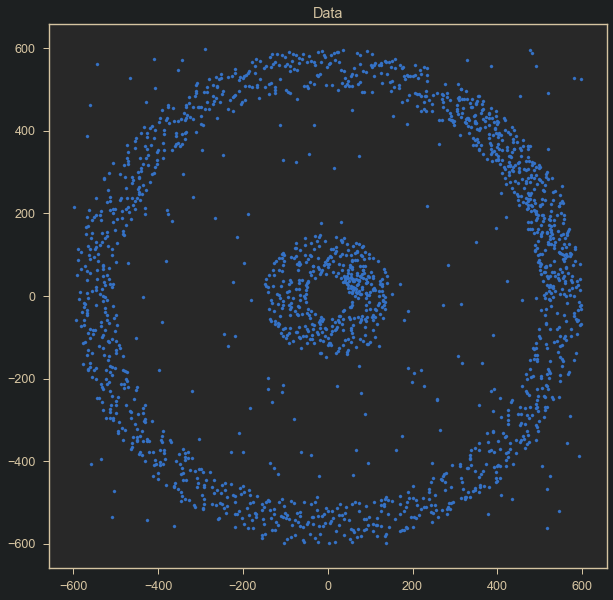

In [2]:
## write your code here
N = 2000; # no of points
# dividing points into 3 parts: cluster1 cluster2 and noise
n_div = [math.floor(0.2*N),math.floor(0.7*N),N-math.floor(0.2*N)-math.floor(0.7*N)];
# declaring data
data = [[],[]];
# delcaring width and radius for the 2 clusters
radius = [50,500];
width = [100,100];
# looping to generate points for the 2 clusters
for n in range(len(n_div)-1):
    # random distance
    r = np.array([np.random.uniform(radius[n],radius[n]+width[n]+1,n_div[n])]);
    # phi is no of pts for that cluster from 0 to 2pi
    phi = np.array([np.linspace(0,2*np.pi+1,n_div[n])]);
    data = np.append(data,np.append(r*np.cos(phi),r*np.sin(phi),axis=0),axis=1);
#appending data for randomly generated noise
data = np.append(data,np.array(np.random.uniform(-radius[n]-width[n],radius[n]+width[n]+1,size=(2,n_div[n+1]))),axis=1);
data = data.T;
#plots
plt.figure(figsize=[10,10]);
plt.scatter(data[:,0],data[:,1],s=10);
plt.title('Data');

B. **Perform DBSCAN Algorithm on the above generated data to obtain clusters**

number of cluster found:  2
Counter:
[[   0    1    2]
 [ 131 1460  409]]
numbrer of outliers found:  131


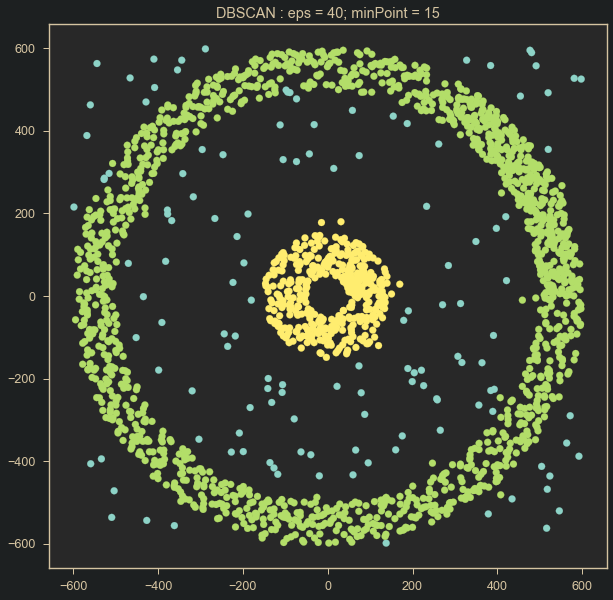

In [3]:
## Write your code here
np.random.shuffle(data); # shuffling data
# parameters for dbscan
eps = 40;
min_pts = 15;
# functn to return index of eps points
def idx_eps_pts(idx,data,eps):
    dist = np.sqrt((data[:,0]-data[idx,0])**2+(data[:,1]-data[idx,1])**2);
    eps_idx = [i for i,v in enumerate(dist) if v <= eps];
    return eps_idx
#declaring labels array
labels = np.zeros(len(data[:,0]));
# index array corresponding to each array
index = np.arange(len(data[:,0]));
# no of clusters
n_cls = 1;
# looping over index
for idx in index:
    if labels[idx]==0: # check if alreeady labeled
        tmp1 = idx_eps_pts(idx,data,eps); # index of eps points close to idx
        i=0; # looping over tmp1 points
        while(i<len(tmp1)):
            tmp2 = idx_eps_pts(tmp1[i],data,eps); # tmp2 = eps points of tmp1 points
            if len(tmp2)>=min_pts and np.sum(labels[tmp2]==0): # check if tmp2  is core or not
                # if core update label
                labels[tmp2] = n_cls;
                labels[tmp1] = n_cls;
                for j in tmp2: #loop to chose next point in eps points of tmp2
                    tmp3 = idx_eps_pts(j,data,eps);
                    if np.sum(labels[tmp3]==0): # check if it has unlabelled pts
                        tmp1 = np.append(tmp1,tmp3); # if core point append tmp3 to tmp1
                        break
            i+=1; # increamenting loop argument
        if (len(tmp1)>=min_pts): # changing cluster label if previous loop is exited and new point is core point
            n_cls+=1;
# printing values            
print('number of cluster found: ',n_cls-1);
print('Counter:')
print((np.asarray(np.unique(labels.astype(int),return_counts=True))))
print('numbrer of outliers found: ',(np.asarray(np.unique(labels.astype(int),return_counts=True)))[1,0])
#plots
plt.figure(figsize=(10,10));
plt.scatter(data[:,0],data[:,1],c=labels,cmap='Set3');
plt.title('DBSCAN : eps = '+ str(eps) + '; minPoint = ' + str(min_pts));

C. **Experiment by varying the number of min points and epsilon radius and plot your observations**

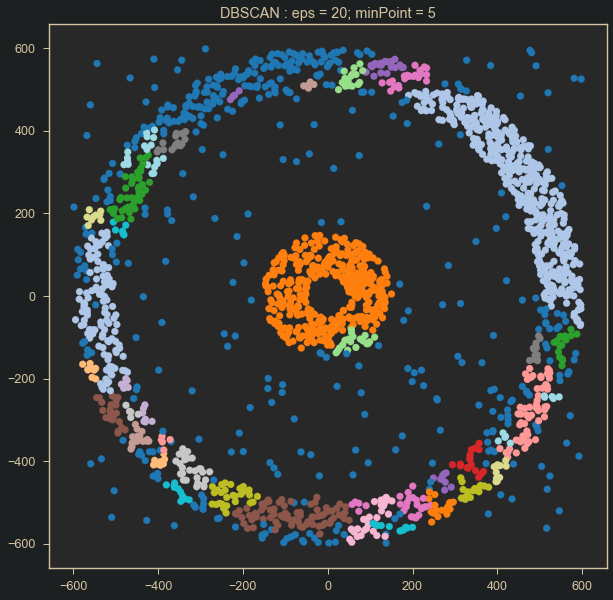

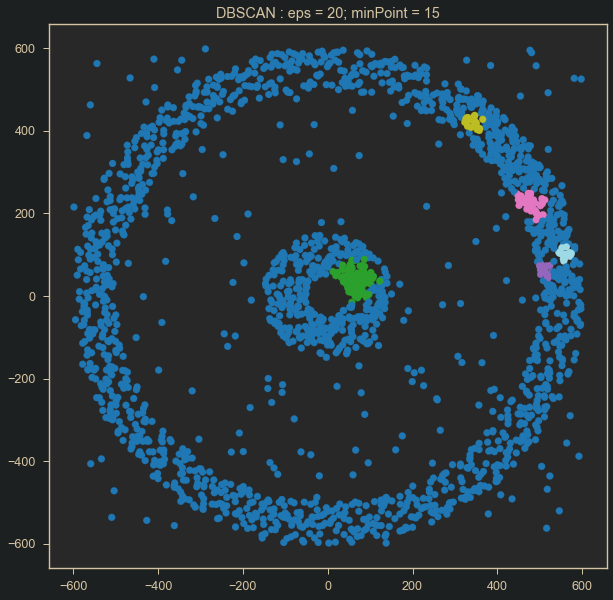

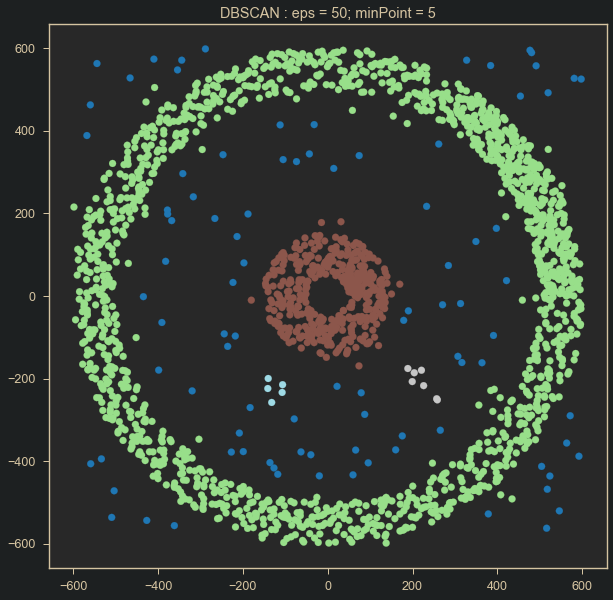

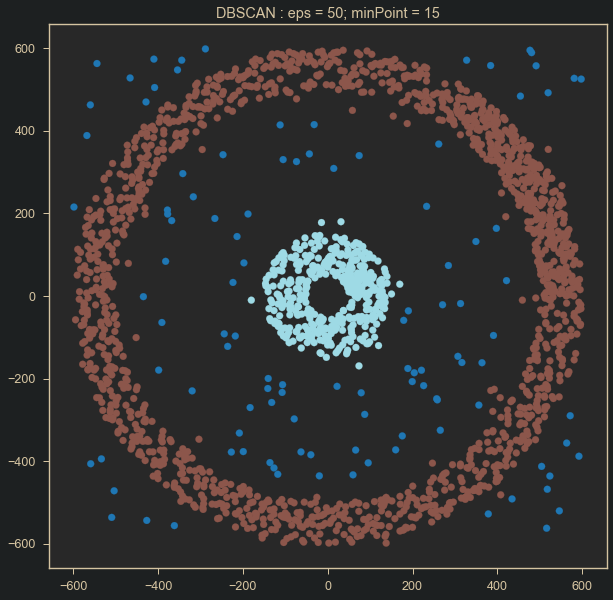

In [4]:
## write your code here
# declaring eps and minpoints array
eps_ar = [20,50]
mnpts_arr = [5,15]
#looping over arrays
for eps in eps_ar:
    for min_pts in mnpts_arr:
        # below code is same as previous
        #declaring labels array
        labels = np.zeros(len(data[:,0]));
        # index array corresponding to each array
        index = np.arange(len(data[:,0]));
        # no of clusters
        n_cls = 1;
        # looping over index
        for idx in index:
            if labels[idx]==0: # check if alreeady labeled
                tmp1 = idx_eps_pts(idx,data,eps); # index of eps points close to idx
                i=0; # looping over tmp1 points
                while(i<len(tmp1)):
                    tmp2 = idx_eps_pts(tmp1[i],data,eps); # tmp2 = eps points of tmp1 points
                    if len(tmp2)>=min_pts and np.sum(labels[tmp2]==0): # check if tmp2  is core or not
                        # if core update label
                        labels[tmp2] = n_cls;
                        labels[tmp1] = n_cls;
                        for j in tmp2: #loop to chose next point in eps points of tmp2
                            tmp3 = idx_eps_pts(j,data,eps);
                            if np.sum(labels[tmp3]==0): # check if it has unlabelled pts
                                tmp1 = np.append(tmp1,tmp3); # if core point append tmp3 to tmp1
                                break
                    i+=1;
                if (len(tmp1)>=min_pts):
                    n_cls+=1;
        plt.figure(figsize=(10,10));
        plt.scatter(data[:,0],data[:,1],c=labels,cmap='tab20');
        plt.title('DBSCAN : eps = '+ str(eps) + '; minPoint = ' + str(min_pts));

D. **Compare your model with the built in DBSCAN in Sci-kit Learn. Also compare you results with GMM and the K-means Algorithm**

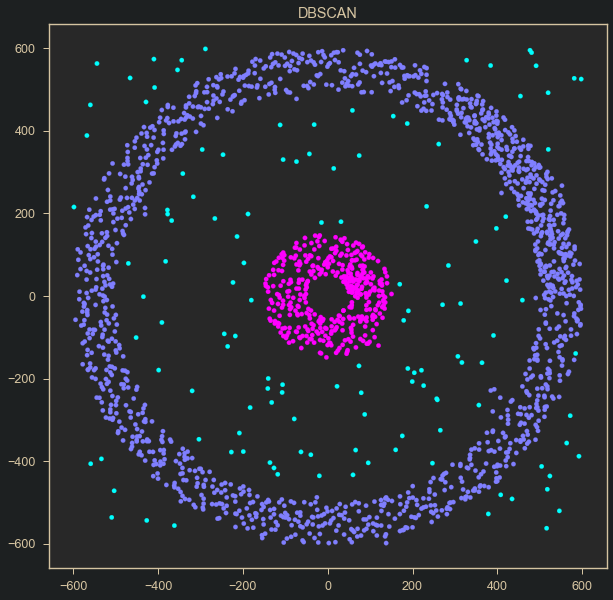

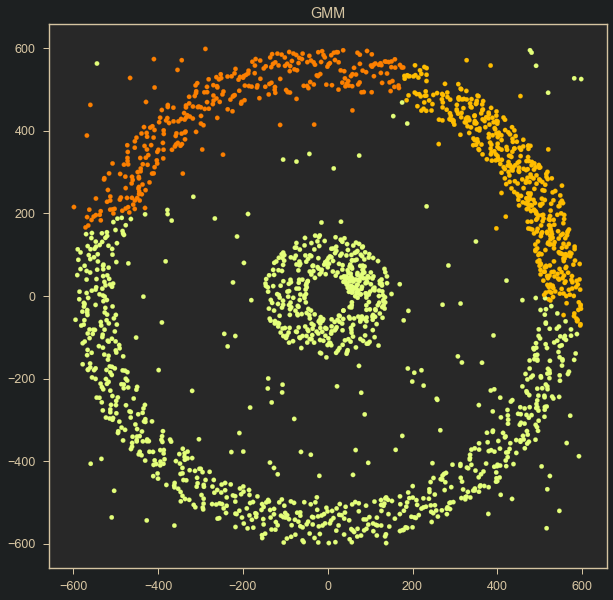

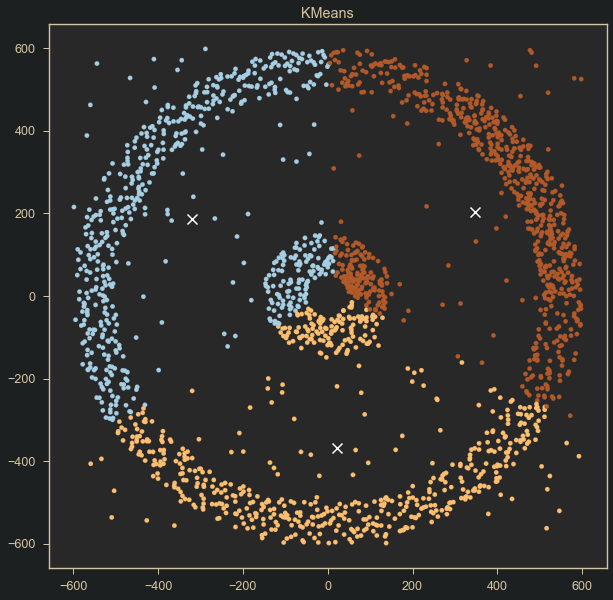

In [5]:
from sklearn.cluster import DBSCAN
## write your code here
#importing dbscan and predicting labels
db=DBSCAN(eps=30,min_samples=5).fit(data)
labels = db.labels_;
# plots
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],c= labels,cmap='cool',s=20)
plt.title('DBSCAN');
########################################################################
from sklearn.mixture import GaussianMixture
## write your code here
# importing gmm and predicting labels
gmm = GaussianMixture(n_components=3).fit(data)
labels = gmm.predict(data)
# plots
plt.figure(figsize=(10,10))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=20, cmap='Wistia')
plt.title('GMM');
########################################################################
from sklearn.cluster import KMeans
## write your code here
# importing kmeans and predicting labels
kmeans = KMeans(n_clusters=3).fit(data)
labels = kmeans.predict(data)
# plots
plt.figure(figsize=(10,10))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=20, cmap='Paired')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', marker = 'x',s=100);
plt.title('KMeans');

# Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.



## Agglomerative Clustering:

Lets start with some dummy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [6]:
def Euclidian_Dist(x,y):
    ## write your code here
    return np.around(np.linalg.norm(x-y),1)

def Dist_mat(X):
    ## write your code here
    #declaring matrix
    dist_mat = np.empty((len(X[0,:]),len(X[1,:])))
    # looping to access elements of matrix
    for i in range(len(X[0,:])):
        for j in range(len(X[1,:])):
            if i==j: # diagonal elements should be inf
                dist_mat[i,j] = np.inf
            else: # nondiagonal elements are distances
                dist_mat[i,j] = Euclidian_Dist(X[:,i],X[:,j])
    return dist_mat

def combine(X):
    ## write your code here
    dist_mat = Dist_mat(X);
    # finding vector location witmin distance
    i = (np.argmin(dist_mat)/len(dist_mat[0,:])).astype(int);
    j = np.argmin(dist_mat)%len(dist_mat[0,:]);
    # averaging the 2 points with min ditance replacing one of the points
    X[:,i] = (X[:,i] + X[:,j])/2.0;
    # deleting other point
    newX = np.delete(X,j,1);
    print('Vector of X to be combined: ',[i+1,j+1])
    return newX;

In [7]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()

## write your code here
print(X)
newX = X
# looping till one point is left
while(len(newX[0,:])>1):
    print(Dist_mat(newX))
    newX = combine(newX)
    print('Mean of clusters after every iteration:')
    print(newX)
## validate from inbuilt Dendogram
import plotly.figure_factory as ff

lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()

[[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
[[inf 1.  5.  6.4 7.4]
 [1.  inf 4.2 5.7 6.7]
 [5.  4.2 inf 1.4 2.5]
 [6.4 5.7 1.4 inf 1.1]
 [7.4 6.7 2.5 1.1 inf]]
Vector of X to be combined:  [1, 2]
Mean of clusters after every iteration:
[[1.5 5.  6.  6.5]
 [1.  4.  5.  6. ]]
[[inf 4.6 6.  7.1]
 [4.6 inf 1.4 2.5]
 [6.  1.4 inf 1.1]
 [7.1 2.5 1.1 inf]]
Vector of X to be combined:  [3, 4]
Mean of clusters after every iteration:
[[1.5  5.   6.25]
 [1.   4.   5.5 ]]
[[inf 4.6 6.5]
 [4.6 inf 2. ]
 [6.5 2.  inf]]
Vector of X to be combined:  [2, 3]
Mean of clusters after every iteration:
[[1.5   5.625]
 [1.    4.75 ]]
[[inf 5.6]
 [5.6 inf]]
Vector of X to be combined:  [1, 2]
Mean of clusters after every iteration:
[[3.5625]
 [2.875 ]]


# Clustering Algorithms on MNIST Digit dataset

Perform Kmeans and gmm clustering on MNIST dataset 


1. Load MNIST data from the given images and labels
2. Consider any 2 classes

In [8]:
# !pip install idx2numpy

(10000, 784)
(10000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


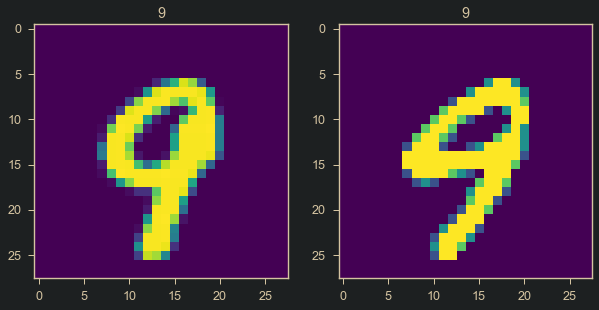

In [9]:
import idx2numpy
from keras.utils import np_utils
img_path = 't10k-images-idx3-ubyte'## write your code here
label_path = 't10k-labels-idx1-ubyte'## write your code here

Images = idx2numpy.convert_from_file(img_path)
labels = idx2numpy.convert_from_file(label_path)

## write your code here
# reshaping images to turn to data format
images = np.reshape(Images,(Images.shape[0],-1))
print(images.shape)
print(labels.shape)
print(images)
# plot of some examples of images with labels
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
tmp = np.random.randint(0,Images.shape[0]); # tmp variable to store a random index for plot
plt.imshow(Images[tmp,:,:]);
plt.title(labels[tmp]);
plt.subplot(1,2,2)
tmp = np.random.randint(0,Images.shape[0]); # tmp variable to store a random index for plot
plt.imshow(Images[tmp,:,:]);
plt.title(labels[tmp]);

In [10]:
# storing data of 2 classes
# declaring data and true label arrays
data = np.empty((0,images.shape[1]));
true_label = np.array([]);
# looping over images
for i in range(len(labels)):
    if labels[i] == 1: # appending images and labels if its a match
        data = np.append(data,np.array([images[i,:]]),axis=0);
        true_label = np.append(true_label,labels[i],);
    if labels[i] == 6: # appending images and labels if its a match
        data = np.append(data,np.array([images[i,:]]),axis=0);
        true_label = np.append(true_label,labels[i],);

Use the K-means clustering algorithm from the last lab to form the clusters 

True labels :
[[   1    6]
 [1135  958]]
Predcited labels :
[[   0    1]
 [1204  889]]


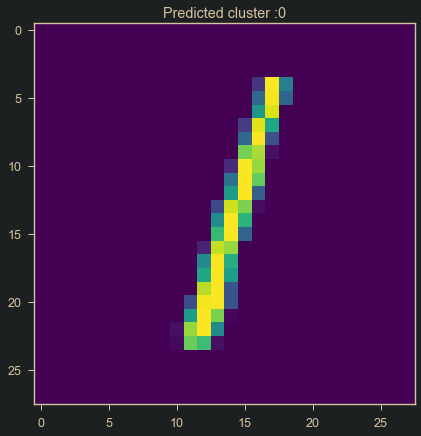

In [11]:
#importing kmeans and predicting labels
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(data)
label = kmeans.predict(data)
# printing true and pred labels
print('True labels :')
print((np.asarray(np.unique(true_label.astype(int),return_counts=True))))
print('Predcited labels :')
print((np.asarray(np.unique(label.astype(int),return_counts=True))))
# showing one image and pred label
plt.imshow(np.reshape(data[0,:],(28,28)));
plt.title('Predicted cluster :'+ str(label[0]));

Use the GMM clustering algorithm from the last lab to form the clusters

True labels :
[[   1    6]
 [1135  958]]
Predcited labels :
[[   0    1]
 [1205  888]]


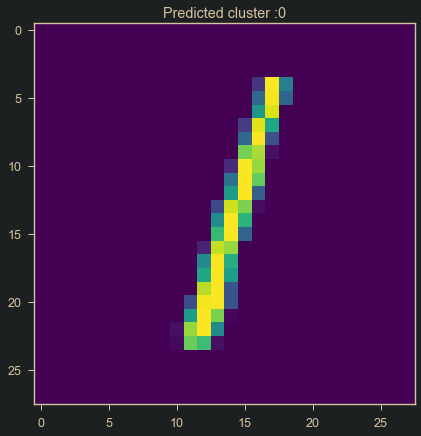

In [12]:
## write your code here
#importing gmm and predicting labels
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(data)
label = gmm.predict(data)
# printing true and pred labels
print('True labels :')
print(np.asarray(np.unique(true_label.astype(int),return_counts=True)))
print('Predcited labels :')
print((np.asarray(np.unique(label.astype(int),return_counts=True))))
# showing one image and pred label
plt.imshow(np.reshape(data[0,:],(28,28)));
plt.title('Predicted cluster :'+ str(label[0]));